# Data Project - Stock Market Analysis
* use pandas to get stock information
* visualize different aspects  
* analyze the risk of a stock based on its previous performance history
* predicte future stock prices through a Monte Carlo method

## 1. Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [74]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [75]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [76]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [77]:
# For loop for grabing yahoo finance data and setting as a dataframe
# Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [78]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-11,93.790001,94.720001,92.589996,93.699997,50074700,91.760163
2016-02-12,94.190002,94.500000,93.010002,93.989998,40351400,92.044160
2016-02-16,95.019997,96.849998,94.610001,96.639999,49057900,94.639300
2016-02-17,96.669998,98.209999,96.150002,98.120003,44863200,96.088664
2016-02-18,98.839996,98.889999,96.089996,96.260002,39021000,94.267170


In [79]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,107.186759,108.077747,106.509881,107.367866,3.526124e+07,106.126281
std,9.046369,9.072979,9.146362,9.151379,1.514848e+07,9.519816
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370
25%,98.699997,99.559998,98.330002,98.830002,2.631520e+07,97.373231
50%,107.879997,108.790001,107.160004,108.000000,3.155250e+07,106.762999
75%,113.699997,114.639999,113.129997,113.580002,3.816880e+07,112.650713
max,132.460007,132.940002,132.050003,132.419998,1.146021e+08,132.419998


In [80]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2016-02-11 to 2017-02-10
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


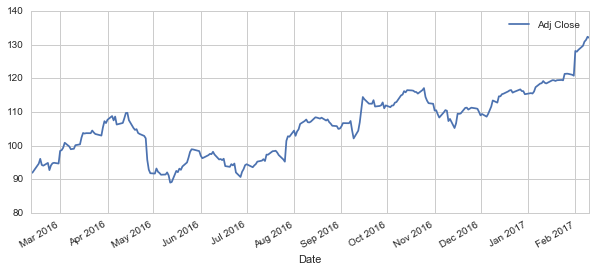

In [81]:
# Historical closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

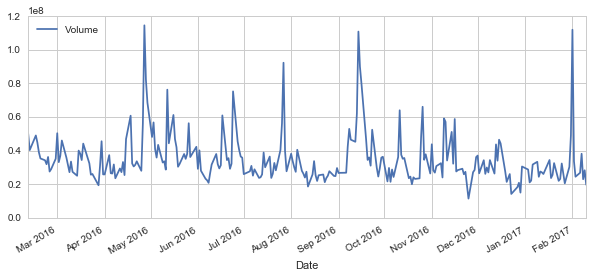

In [82]:
# Total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

## 2. Moving Average

In [83]:
# pandas has a built-in rolling mean calculator
# Let's go ahead and plot out several moving averages

ma_day = [10,20,50]

for ma in ma_day:
    
    column_name = "MA for %s days" % (str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

y:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
y:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
y:\Anaconda3\envs\gl-env\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


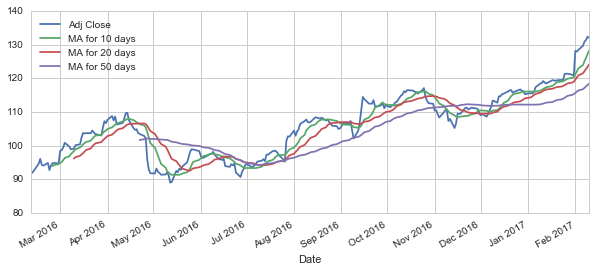

In [84]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

## 3. Daily Return Analysis
* Analyze the risk of the stock
* Daily changes of the stock

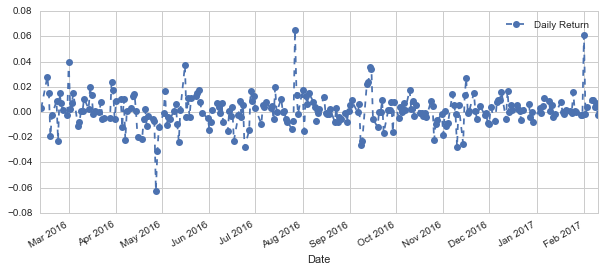

In [85]:
# use pct_change to find the percent change for each day, and plot the daily return percentage
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

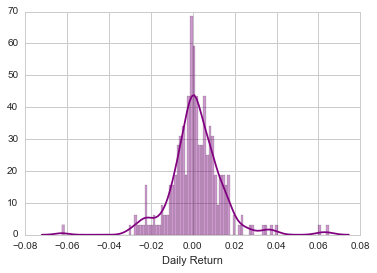

In [86]:
# Average daily return using a histogram -  seaborn - histogram and kde plot 
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

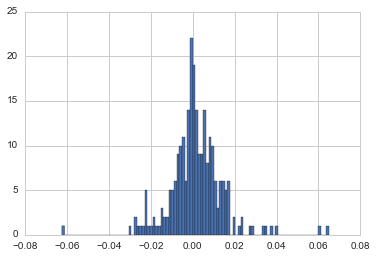

In [87]:
# Could have also done by matplotlib:
AAPL['Daily Return'].hist(bins=100)

In [88]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-11,91.760163,503.820007,683.109985,48.362910
2016-02-12,92.044160,507.079987,682.400024,49.151279
2016-02-16,94.639300,521.099976,691.000000,50.082544
2016-02-17,96.088664,534.099976,708.400024,51.386315
2016-02-18,94.267170,525.000000,697.349976,51.160851


In [89]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-11,NaN,NaN,NaN,NaN
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947
2016-02-17,0.015315,0.024947,0.025181,0.026032
2016-02-18,-0.018956,-0.017038,-0.015599,-0.004388


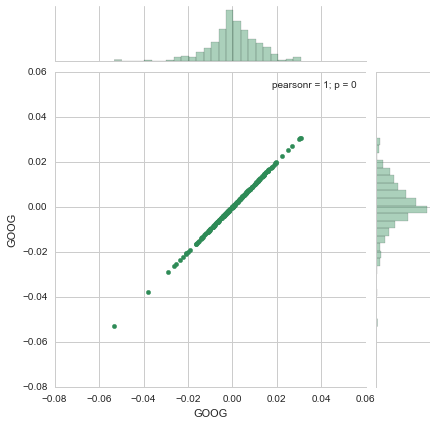

In [90]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

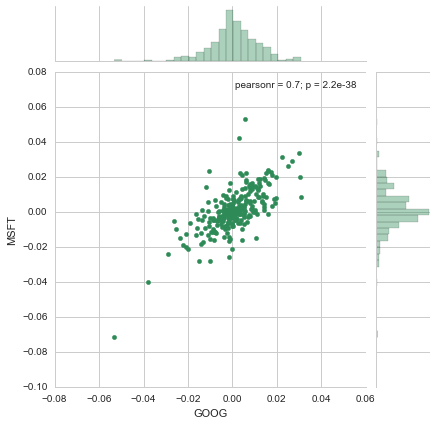

In [91]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

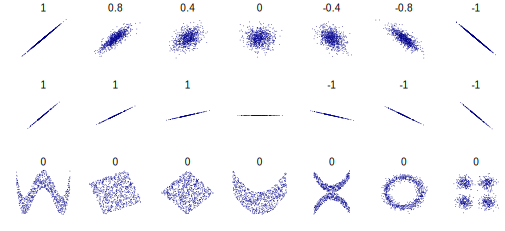

In [92]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

## 4. sns.pairplot()

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use **sns.pairplot()** to automatically create this plot

In [93]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-11,NaN,NaN,NaN,NaN
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947
2016-02-17,0.015315,0.024947,0.025181,0.026032
2016-02-18,-0.018956,-0.017038,-0.015599,-0.004388


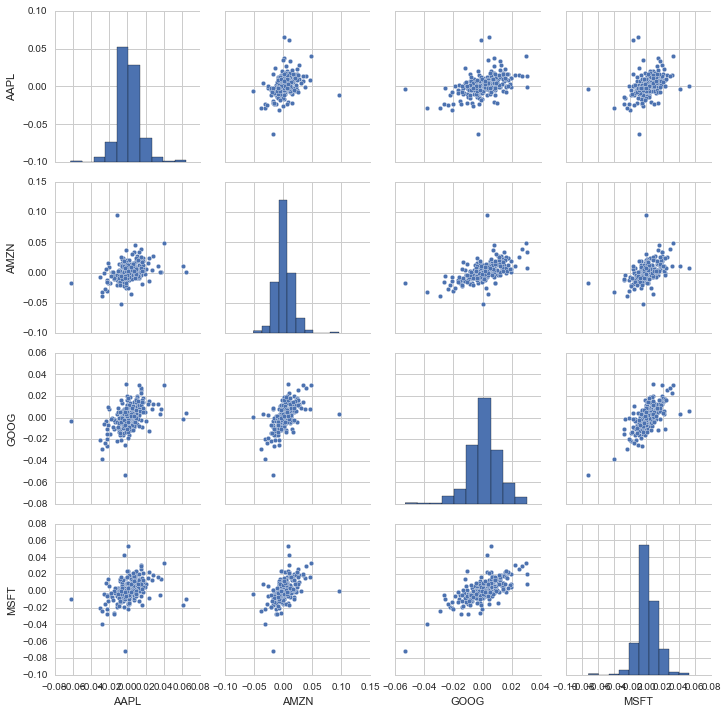

In [94]:
# pairplot - visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling **sns.pairplot()** is fantastic we can also use **sns.PairGrid()** for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

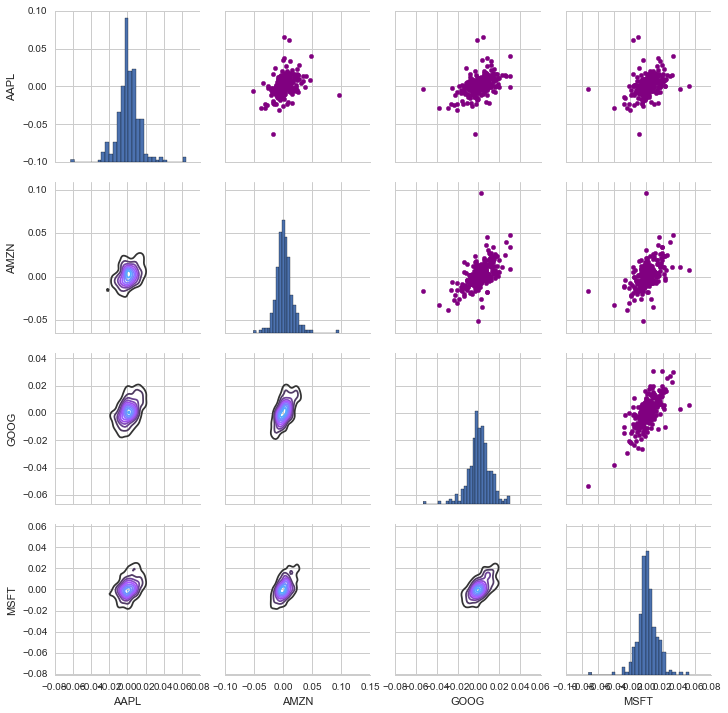

In [95]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# upper triangle - scatter plot
return_fig.map_upper(plt.scatter,color='purple')

# lower triangle - kde
return_fig.map_lower(sns.kdeplot,cmap='cool_d')

# diagonal - histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30)

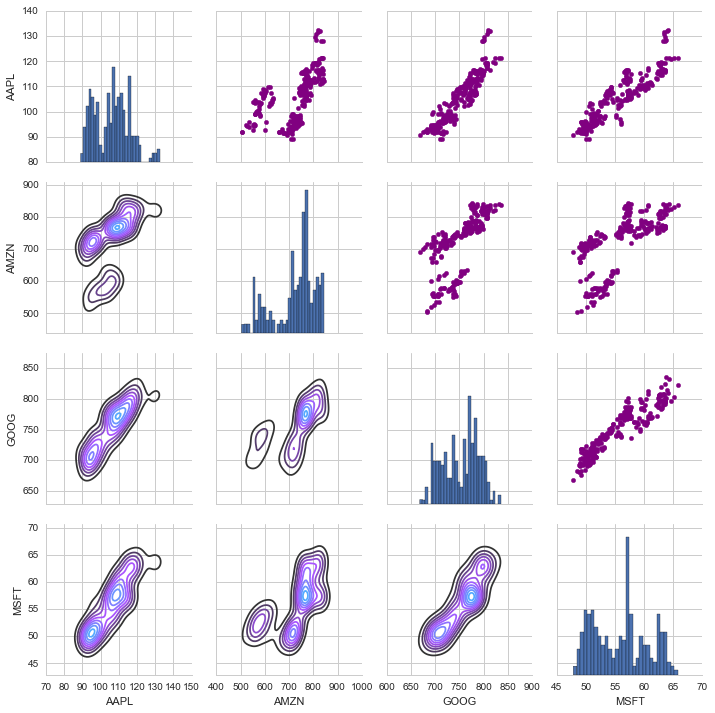

In [96]:
# DataFrame - correlation of the closing prices
return_fig = sns.PairGrid(closing_df)

# upper triangle - scatter plot
return_fig.map_upper(plt.scatter,color='purple')

# lower triangle - kde
return_fig.map_lower(sns.kdeplot,cmap='cool_d')

# diagonal - histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

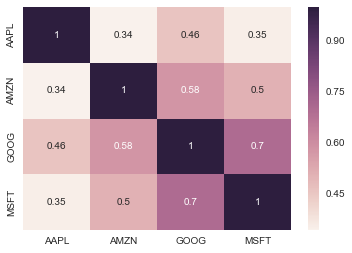

In [101]:
# sebron correlation plot for the daily returns
sns.heatmap(tech_rets.dropna().corr(),annot=True)

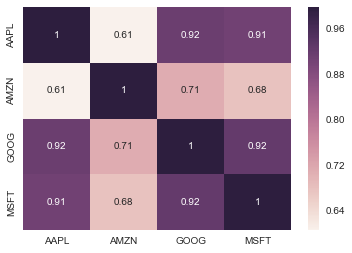

In [103]:
sns.heatmap(closing_df.corr(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.
Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

## 5. Risk Analysis - VaR
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

* url: http://matplotlib.org/users/annotations_guide.html

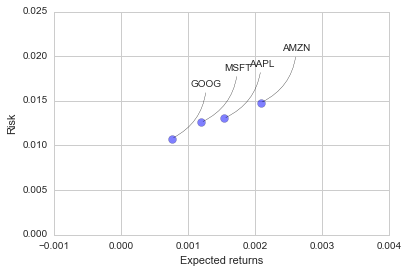

In [107]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.0,0.025])
plt.xlim([-0.001,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## 6. Risk Analysis - VaR
* value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval
* **"bootstrap"** method calculate the empirical [quantiles](http://en.wikipedia.org/wiki/Quantile) from a histogram of daily returns

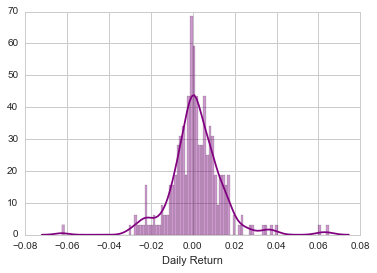

In [109]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [110]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-02-12,0.003095,0.006471,-0.001039,0.016301
2016-02-16,0.028195,0.027648,0.012603,0.018947
2016-02-17,0.015315,0.024947,0.025181,0.026032
2016-02-18,-0.018956,-0.017038,-0.015599,-0.004388
2016-02-19,-0.002285,0.018857,0.005105,-0.007089


In [111]:
rets['AAPL'].quantile(0.05)

-0.020747923633215939

The 0.05 empirical quantile of daily returns is at -0.02. That means that with 95% confidence, our worst daily loss will not exceed 2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.02 * 1,000,000 = $20,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

**Value at Risk using the Monte Carlo method**

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.
This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as **"drift"**, which is the **average daily return multiplied by the change of time**. The second term is known as **"shock"**, for each tiem period the stock will "drift" and then experience a "shock" which will **randomly push the stock price up or down**. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:

http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [112]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [113]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [114]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-11,675.000000,689.349976,668.867981,683.109985,3024000,683.109985
2016-02-12,690.260010,693.750000,678.599976,682.400024,2141400,682.400024
2016-02-16,692.979980,698.000000,685.049988,691.000000,2520000,691.000000
2016-02-17,698.090027,709.750000,691.380005,708.400024,2492600,708.400024
2016-02-18,710.000000,712.349976,696.030029,697.349976,1883200,697.349976


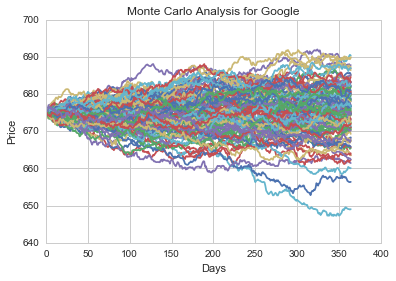

In [115]:
# Get start price from GOOG.head()
start_price = 675

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [118]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

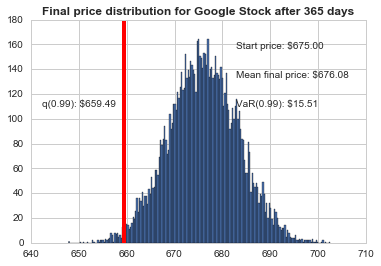

In [120]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $15.51 for every investment of 675 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $15.51 at risk 99% of the time from our Monte Carlo Simulation.